In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [3]:
#Dropping the nonsense rows at the beginning and specifying the column row
data = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls',
                    header=1, skiprows=[0,1,2,])

In [4]:
data.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [75]:
#Only selecting columns needed for evaluation
data_short = data.iloc[:, [1,3,6,8]]

In [76]:
data_short.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
0,1861.000,0.000,0.000,12.000
1,2577.000,0.000,0.000,24.000
2,2846.000,0.000,0.000,16.000
3,97956.000,8.000,227.000,4090.000
4,6388.000,0.000,4.000,223.000


In [80]:
#Adding Pop squared column
data_short['Population_sq'] = data_short.Population ** 2

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
#Renaming columns, because of strange error
data_short.columns = ['Population', 'Murder','Robbery', 'Population_sq','Property_crime']

In [82]:
#Turning Murder continuous into categorical
data_short.Murder = (data_short.Murder > 0).astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [83]:
#Turning Robbery continuous into categorical
data_short.Robbery = (data_short.Robbery > 0).astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [84]:
#Checking if we have NaN values in the data set
data_check = data_short.apply(lambda x: np.isnan(x))

In [85]:
#Looks like we do for the two population variables and Property Crime
for item in data_check:
    display(data_check[item].value_counts())

False    348
True       3
Name: Population, dtype: int64

False    351
Name: Murder, dtype: int64

False    351
Name: Robbery, dtype: int64

False    348
True       3
Name: Population_sq, dtype: int64

False    348
True       3
Name: Property_crime, dtype: int64

In [86]:
#Removing the NaN
data_short = data_short.dropna()

In [87]:
#Checking that all the values are above zero
(data_short.Population > 0).astype(int).sum()

348

In [93]:
# Initiate and fit our model.
regr = linear_model.LinearRegression()
Y = data_short['Property_crime'].values.reshape(-1,1)
X = data_short[['Population','Murder','Population_sq','Robbery',]]
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 1.94497141e-09 -5.22705023e-05  1.00000000e+00  4.13522685e-06]]

Intercept: 
 [0.]

R-squared:
1.0


In [92]:
#Running cross val score over different samples of the data
for i in range(10):
    data_short = data_short.sample(frac=1)
    Y = data_short['Property_crime'].values.reshape(-1,1)
    X = data_short[['Population','Murder','Population_sq','Robbery']]
    print(cross_val_score(regr,X,Y, cv=4))

[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]


(array([347.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.76676000e+05, 7.04949343e+12, 1.40989866e+13, 2.11484797e+13,
        2.81979729e+13, 3.52474660e+13, 4.22969592e+13, 4.93464523e+13,
        5.63959455e+13, 6.34454387e+13, 7.04949318e+13]),
 <a list of 10 Patch objects>)

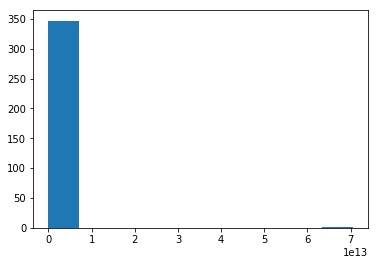

In [97]:
#Checking out the distribution of the data to see if it is normal
plt.hist(data_short['Population_sq'])

(array([ 19.,  89., 100.,  75.,  51.,  10.,   3.,   0.,   0.,   1.]),
 array([2.72098574, 3.14129506, 3.56160438, 3.98191371, 4.40222303,
        4.82253235, 5.24284167, 5.66315099, 6.08346031, 6.50376963,
        6.92407895]),
 <a list of 10 Patch objects>)

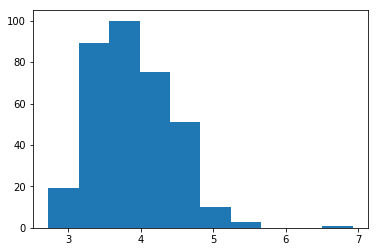

In [98]:
#Data is exponential, so let's take the log
plt.hist(np.log10(data_short['Population']))

In [99]:
#Data looks a lot more normal, let's replace our current Population with that
data_short.Population = np.log10(data_short['Population'])

(array([347.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.76676000e+05, 7.04949343e+12, 1.40989866e+13, 2.11484797e+13,
        2.81979729e+13, 3.52474660e+13, 4.22969592e+13, 4.93464523e+13,
        5.63959455e+13, 6.34454387e+13, 7.04949318e+13]),
 <a list of 10 Patch objects>)

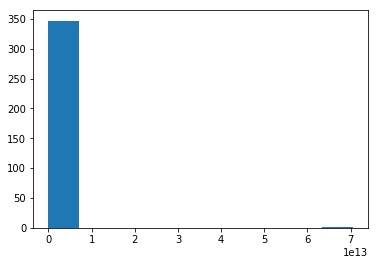

In [101]:
#Taking a look at Population squared, expecting similar results
plt.hist(data_short.Population_sq)

(array([ 19.,  89., 100.,  75.,  51.,  10.,   3.,   0.,   0.,   1.]),
 array([ 5.44197149,  6.28259013,  7.12320877,  7.96382741,  8.80444605,
         9.64506469, 10.48568333, 11.32630197, 12.16692061, 13.00753925,
        13.84815789]),
 <a list of 10 Patch objects>)

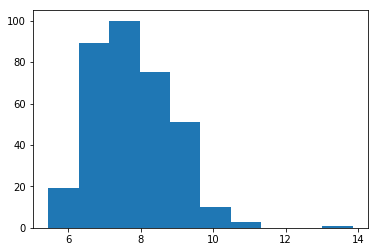

In [102]:
#Log normalizes
plt.hist(np.log10(data_short['Population_sq']))

In [103]:
#Replace data
data_short.Population_sq = np.log10(data_short['Population_sq'])

(array([347.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([2.76676000e+05, 7.04949343e+12, 1.40989866e+13, 2.11484797e+13,
        2.81979729e+13, 3.52474660e+13, 4.22969592e+13, 4.93464523e+13,
        5.63959455e+13, 6.34454387e+13, 7.04949318e+13]),
 <a list of 10 Patch objects>)

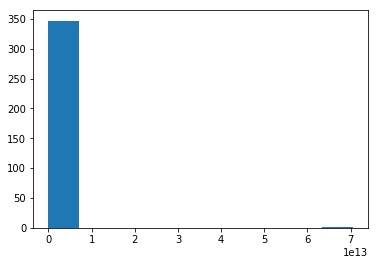

In [108]:
#Finally let's look at our last non-binary predictor
plt.hist(data_short.Property_crime)

(array([ 19.,  89., 100.,  75.,  51.,  10.,   3.,   0.,   0.,   1.]),
 array([ 5.44197149,  6.28259013,  7.12320877,  7.96382741,  8.80444605,
         9.64506469, 10.48568333, 11.32630197, 12.16692061, 13.00753925,
        13.84815789]),
 <a list of 10 Patch objects>)

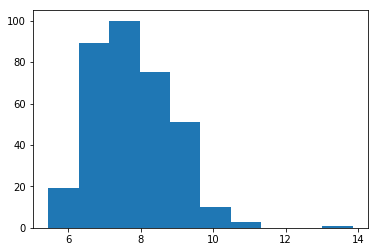

In [107]:
#Expoential, let's take the log
prop_crimes_log = np.log10(data_short['Property_crime'], 
                           where=(data_short['Property_crime'] != 0))
plt.hist(prop_crimes_log)

In [111]:
#Replace data
data_short.Property_crime = prop_crimes_log

In [120]:
#Use logs instead of values for Pop/Pop_sq/Property Crime
Y2 = data_short['Property_crime'].values.reshape(-1,1)
X2 = data_short[['Population','Population_sq', 'Murder', 'Robbery']]
regr.fit(X2,Y2)
#Results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X2, Y2))


Coefficients: 
 [[ 4.00000000e-01  8.00000000e-01 -8.50014503e-17 -1.11022302e-16]]

Intercept: 
 [-1.77635684e-15]

R-squared:
1.0


In [121]:
#Evaluate data set - Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(regr,Y2,X2, cv=3)

array([0.8687373 , 0.84856874, 0.86167521])

In [122]:
data_fold1 = data_short.iloc[:174,:]
data_fold2 = data_short.iloc[174:,:]

In [123]:
#Train data on fold 1
Y_fold1 = data_fold1['Property_crime'].values.reshape(-1,1)
X_fold1 = data_fold1[['Population','Population_sq', 'Murder','Robbery']]
regr.fit(X_fold1,Y_fold1)
#Results
Y_fold2 = data_fold2['Property_crime'].values.reshape(-1,1)
X_fold2 = data_fold2[['Population','Population_sq', 'Murder','Robbery']]
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_fold2, Y_fold2))
print(regr.score(X_fold1, Y_fold1))


Coefficients: 
 [[ 4.00000000e-01  8.00000000e-01 -1.17961196e-16 -5.55111512e-17]]

Intercept: 
 [1.77635684e-15]

R-squared:
1.0
1.0


In [ ]:
#A bit concerned with overfitting, even with the data normalized, 
#there is a R2 value of 1.0. CVS initially was 1's across the board, and after 
#normalization it lowered but it highly consistent.
